## **Analyzing NCAA - D1 Players' First Season in the NHL**

---
#### Ever since the NHL debut of Cale Makar during the 2019-20 NHL Playoffs, he has dominated every conversation discussing the top defensemen in the league. He won the Calder Trophy as the NHL's most impressive Rookie, then was nominated for the Norris Trophy the next year, won it the year after that, and then won the Conn Smythe Trophy as the NHL playoff's MVP when the Avalanche won the cup in 2022. On top of that, he won the Hobey Baker award as a college sophomore at UMass and led the Hockey East in scoring as defenseman. 

#### All of these accomplishments led me to the question:
---
## ***Does success in Division 1 hockey lead to success in the NHL?***

---
First, we will import all the required packages. The main package to note here is the TopDownHockey Web Scraper. This package can be used to scrape NHL data as well as Elite Prospects data, and can be installed with <code>pip install TopDownHockey-Scraper</code>

In [1]:
import TopDownHockey_Scraper.TopDownHockey_EliteProspects_Scraper as tdhepscrape
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Welcome to the TopDownHockey EliteProspects Scraper, built by Patrick Bacon.
This scraper is built strictly for personal use. For commercial or professional use, please look into the EliteProspects API.
If you enjoy the scraper and would like to support my work, feel free to follow me on Twitter @TopDownHockey. Have fun!


We would like to get all the players that played NCAA D1 Men's Hockey in the 2020-21 season and then played in the NHL for the 2021-22 seaon. This will likely take about a minute to run.

In [2]:
leagues = ["ncaa", "nhl"]
seasons = ["2020-2021", "2021-2022"]

d1_nhl_skaters_20to22 = tdhepscrape.get_skaters(leagues, seasons)

Your scrape request is skater data from the following leagues:
ncaa and nhl
In the following seasons:
2020-2021 and 2021-2022
Beginning scrape of ncaa skater data from 2020-2021.
Successfully scraped all ncaa skater data from 2020-2021.
Beginning scrape of ncaa skater data from 2021-2022.
Successfully scraped all ncaa skater data from 2021-2022.
Scraping ncaa data is complete. You scraped skater data from 2020-2021 and 2021-2022.
Beginning scrape of nhl skater data from 2020-2021.
Successfully scraped all nhl skater data from 2020-2021.
Beginning scrape of nhl skater data from 2021-2022.
Successfully scraped all nhl skater data from 2021-2022.
Scraping nhl data is complete. You scraped skater data from 2020-2021 and 2021-2022.
Completed scraping skater data from the following leagues:
nhl and ncaa
Incorporating the following seasons:
2020-2021 and 2021-2022


In [3]:
d1_nhl_skaters_20to22

,player,team,gp,g,a,tp,ppg,pim,+/-,link,season,league,playername,position
0,Cole Caufield (LW/RW),Univ. of Wisconsin,31,30,22,52,1.68,4,9,https://www.eliteprospects.com/player/316168/c...,2020-2021,ncaa,Cole Caufield,LW/RW
1,Odeen Tufto (C),Quinnipiac Univ.,29,8,39,47,1.62,22,8,https://www.eliteprospects.com/player/248460/o...,2020-2021,ncaa,Odeen Tufto,C
2,Linus Weissbach (LW),Univ. of Wisconsin,31,12,29,41,1.32,12,7,https://www.eliteprospects.com/player/230472/l...,2020-2021,ncaa,Linus Weissbach,LW
3,Jordan Kawaguchi (C),Univ. of North Dakota,28,10,26,36,1.29,24,19,https://www.eliteprospects.com/player/199911/j...,2020-2021,ncaa,Jordan Kawaguchi,C
4,Dylan Holloway (LW/C),Univ. of Wisconsin,23,11,24,35,1.52,19,10,https://www.eliteprospects.com/player/322111/d...,2020-2021,ncaa,Dylan Holloway,LW/C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,Victor Söderström (D),Arizona Coyotes,16,0,0,0,0.00,6,-7,https://www.eliteprospects.com/player/344555/v...,2021-2022,nhl,Victor Söderström,D
4970,Austin Poganski (RW),Winnipeg Jets,16,0,0,0,0.00,7,-3,https://www.eliteprospects.com/player/231724/a...,2021-2022,nhl,Austin Poganski,RW
4971,Mikhail Maltsev (LW),Colorado Avalanche,18,0,0,0,0.00,2,-5,https://www.eliteprospects.com/player/312218/m...,2021-2022,nhl,Mikhail Maltsev,LW
4972,Olli Juolevi (D),totals,18,0,0,0,0.00,6,-1,https://www.eliteprospects.com/player/196391/o...,2021-2022,nhl,Olli Juolevi,D


This is a dataframe with 4,974 rows because it is a compiled list of all players that played NCAA D1 or NHL between 2020 and 2022. We will now clean it up a bit and filter it down even more.

In [4]:
# The player and playername columns are the same, so we can drop one of them

d1_nhl_skaters_20to22 = d1_nhl_skaters_20to22.drop(columns=["player"])

d1_nhl_skaters_20to22

,team,gp,g,a,tp,ppg,pim,+/-,link,season,league,playername,position
0,Univ. of Wisconsin,31,30,22,52,1.68,4,9,https://www.eliteprospects.com/player/316168/c...,2020-2021,ncaa,Cole Caufield,LW/RW
1,Quinnipiac Univ.,29,8,39,47,1.62,22,8,https://www.eliteprospects.com/player/248460/o...,2020-2021,ncaa,Odeen Tufto,C
2,Univ. of Wisconsin,31,12,29,41,1.32,12,7,https://www.eliteprospects.com/player/230472/l...,2020-2021,ncaa,Linus Weissbach,LW
3,Univ. of North Dakota,28,10,26,36,1.29,24,19,https://www.eliteprospects.com/player/199911/j...,2020-2021,ncaa,Jordan Kawaguchi,C
4,Univ. of Wisconsin,23,11,24,35,1.52,19,10,https://www.eliteprospects.com/player/322111/d...,2020-2021,ncaa,Dylan Holloway,LW/C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,Arizona Coyotes,16,0,0,0,0.00,6,-7,https://www.eliteprospects.com/player/344555/v...,2021-2022,nhl,Victor Söderström,D
4970,Winnipeg Jets,16,0,0,0,0.00,7,-3,https://www.eliteprospects.com/player/231724/a...,2021-2022,nhl,Austin Poganski,RW
4971,Colorado Avalanche,18,0,0,0,0.00,2,-5,https://www.eliteprospects.com/player/312218/m...,2021-2022,nhl,Mikhail Maltsev,LW
4972,totals,18,0,0,0,0.00,6,-1,https://www.eliteprospects.com/player/196391/o...,2021-2022,nhl,Olli Juolevi,D


Now to test something out, lets see if Cole Caufield is in the dataframe three times. He should be in there for the University of Wisconsin and then for the Montreal Canadiens twice.

In [5]:
d1_nhl_skaters_20to22.loc[(d1_nhl_skaters_20to22.playername=="Cole Caufield")]

,team,gp,g,a,tp,ppg,pim,+/-,link,season,league,playername,position


Nothing showed up because after inspection, we see there is whitespace at the end of the names in <code>playername</code> so we can use <code>str.strip()</code> to fix that.

In [6]:
d1_nhl_skaters_20to22.playername = d1_nhl_skaters_20to22.playername.str.strip()

# Now we can see if it worked
d1_nhl_skaters_20to22.loc[(d1_nhl_skaters_20to22.playername=="Cole Caufield")]

,team,gp,g,a,tp,ppg,pim,+/-,link,season,league,playername,position
0,Univ. of Wisconsin,31,30,22,52,1.68,4,9,https://www.eliteprospects.com/player/316168/c...,2020-2021,ncaa,Cole Caufield,LW/RW
3599,Montréal Canadiens,10,4,1,5,0.50,2,-1,https://www.eliteprospects.com/player/316168/c...,2020-2021,nhl,Cole Caufield,LW/RW
4124,Montréal Canadiens,67,23,20,43,0.64,10,-24,https://www.eliteprospects.com/player/316168/c...,2021-2022,nhl,Cole Caufield,LW/RW


Now we will rearrange the columns, rename some, and then create 2 different dataframes; one for NCAA 2020-21 season and one for NHL 2021-22 season.

In [7]:
d1_nhl_skaters_20to22 = d1_nhl_skaters_20to22.loc[:, ['playername', 'team', 'season', 'league', 'position', 'gp', 'g', 'a', 'tp', 'ppg', 'pim', '+/-', 'link']]

d1_nhl_skaters_20to22 = d1_nhl_skaters_20to22.rename(columns={'playername':'player'})

# Now to create the 2 dataframes for the 2 leagues/seasons
d1_skaters_2020_21 = d1_nhl_skaters_20to22.loc[(d1_nhl_skaters_20to22.season=="2020-2021") & (d1_nhl_skaters_20to22.league=="ncaa")]

nhl_skaters_2021_22 = d1_nhl_skaters_20to22.loc[(d1_nhl_skaters_20to22.season=="2021-2022") & (d1_nhl_skaters_20to22.league=="nhl")]

Now we will merge these two dataframes we just created so that we can have one main dataframe. To ensure we are only keeping D1 hockey players from 2020-21 that played in the NHL in 2021-22, we will use an inner merge. We will use 'link' as the foreign key since each player has their own link no matter what team they played on.

In [8]:
ncaa_2020_21_nhl_2021_22 = d1_skaters_2020_21.merge(nhl_skaters_2021_22, on = 'link', how = 'inner')

ncaa_2020_21_nhl_2021_22

,player_x,team_x,season_x,league_x,position_x,gp_x,g_x,a_x,tp_x,ppg_x,...,season_y,league_y,position_y,gp_y,g_y,a_y,tp_y,ppg_y,pim_y,+/-_y
0,Cole Caufield,Univ. of Wisconsin,2020-2021,ncaa,LW/RW,31,30,22,52,1.68,...,2021-2022,nhl,LW/RW,67,23,20,43,0.64,10,-24
1,Dylan Holloway,Univ. of Wisconsin,2020-2021,ncaa,LW/C,23,11,24,35,1.52,...,2021-2022,nhl,LW/C,0,0,0,0,0.00,0,0
2,Shane Pinto,Univ. of North Dakota,2020-2021,ncaa,C,28,15,17,32,1.14,...,2021-2022,nhl,C,5,0,1,1,0.20,2,0
3,Alex Steeves,Univ. of Notre Dame,2020-2021,ncaa,F,29,15,17,32,1.10,...,2021-2022,nhl,F,3,0,1,1,0.33,0,-1
4,Sampo Ranta,Univ. of Minnesota,2020-2021,ncaa,LW/RW,31,19,12,31,1.00,...,2021-2022,nhl,LW/RW,10,0,0,0,0.00,2,-4
5,Matt Boldy,Boston College,2020-2021,ncaa,LW/RW,22,11,20,31,1.41,...,2021-2022,nhl,LW/RW,47,15,24,39,0.83,10,17
6,Thomas Bordeleau,Univ. of Michigan,2020-2021,ncaa,C,24,8,22,30,1.25,...,2021-2022,nhl,C,8,0,5,5,0.63,0,-1
7,Ben Meyers,Univ. of Minnesota,2020-2021,ncaa,C/LW,31,12,16,28,0.90,...,2021-2022,nhl,C/LW,5,1,0,1,0.20,0,-2
8,Scott Reedy,Univ. of Minnesota,2020-2021,ncaa,C,28,11,17,28,1.00,...,2021-2022,nhl,C,35,7,2,9,0.26,10,-8
9,Jackson Cates,Univ. of Minnesota-Duluth,2020-2021,ncaa,C,28,11,16,27,0.96,...,2021-2022,nhl,C,11,1,0,1,0.09,0,-2


Unfortunately our sample size is very minimal now (33 players). But that was expected. We will carry on with the analysis.

We can drop irrelevant columns now though because some were duplicated in the merge.

In [9]:
ncaa_2020_21_nhl_2021_22 = ncaa_2020_21_nhl_2021_22.drop(columns = ['season_x', 'league_x', 'season_y', 'league_y', 'player_y', 'position_y'])

ncaa_2020_21_nhl_2021_22

,player_x,team_x,position_x,gp_x,g_x,a_x,tp_x,ppg_x,pim_x,+/-_x,link,team_y,gp_y,g_y,a_y,tp_y,ppg_y,pim_y,+/-_y
0,Cole Caufield,Univ. of Wisconsin,LW/RW,31,30,22,52,1.68,4,9,https://www.eliteprospects.com/player/316168/c...,Montréal Canadiens,67,23,20,43,0.64,10,-24
1,Dylan Holloway,Univ. of Wisconsin,LW/C,23,11,24,35,1.52,19,10,https://www.eliteprospects.com/player/322111/d...,Edmonton Oilers,0,0,0,0,0.00,0,0
2,Shane Pinto,Univ. of North Dakota,C,28,15,17,32,1.14,4,19,https://www.eliteprospects.com/player/388979/s...,Ottawa Senators,5,0,1,1,0.20,2,0
3,Alex Steeves,Univ. of Notre Dame,F,29,15,17,32,1.10,8,2,https://www.eliteprospects.com/player/354353/a...,Toronto Maple Leafs,3,0,1,1,0.33,0,-1
4,Sampo Ranta,Univ. of Minnesota,LW/RW,31,19,12,31,1.00,10,19,https://www.eliteprospects.com/player/375954/s...,Colorado Avalanche,10,0,0,0,0.00,2,-4
5,Matt Boldy,Boston College,LW/RW,22,11,20,31,1.41,4,15,https://www.eliteprospects.com/player/375501/m...,Minnesota Wild,47,15,24,39,0.83,10,17
6,Thomas Bordeleau,Univ. of Michigan,C,24,8,22,30,1.25,12,18,https://www.eliteprospects.com/player/296636/t...,San Jose Sharks,8,0,5,5,0.63,0,-1
7,Ben Meyers,Univ. of Minnesota,C/LW,31,12,16,28,0.90,12,15,https://www.eliteprospects.com/player/300838/b...,Colorado Avalanche,5,1,0,1,0.20,0,-2
8,Scott Reedy,Univ. of Minnesota,C,28,11,17,28,1.00,6,20,https://www.eliteprospects.com/player/269301/s...,San Jose Sharks,35,7,2,9,0.26,10,-8
9,Jackson Cates,Univ. of Minnesota-Duluth,C,28,11,16,27,0.96,4,8,https://www.eliteprospects.com/player/353776/j...,Philadelphia Flyers,11,1,0,1,0.09,0,-2


Time to rearrange some columns.

In [10]:
my_columns = list(ncaa_2020_21_nhl_2021_22.columns)

my_columns.remove('link')

my_columns.append('link')

In [11]:
ncaa_2020_21_nhl_2021_22 = ncaa_2020_21_nhl_2021_22.loc[:, my_columns]

ncaa_2020_21_nhl_2021_22 = ncaa_2020_21_nhl_2021_22.rename(columns = {'player_x':'player', 'team_x':'ncaa_team', 'position_x':'position', 'gp_x':'ncaa_gp', 
                                                        'g_x':'ncaa_g', 'a_x':'ncaa_a', 'tp_x':'ncaa_p', 'ppg_x':'ncaa_ppg', 'pim_x':'ncaa_pim', 
                                                        '+/-_x':'ncaa_+/-', 'team_y':'nhl_team', 'gp_y':'nhl_gp', 'g_y':'nhl_g', 'a_y':'nhl_a', 
                                                        'tp_y':'nhl_p', 'ppg_y':'nhl_ppg', 'pim_y':'nhl_pim', '+/-_y':'nhl_+/-'})

ncaa_2020_21_nhl_2021_22

,player,ncaa_team,position,ncaa_gp,ncaa_g,ncaa_a,ncaa_p,ncaa_ppg,ncaa_pim,ncaa_+/-,nhl_team,nhl_gp,nhl_g,nhl_a,nhl_p,nhl_ppg,nhl_pim,nhl_+/-,link
0,Cole Caufield,Univ. of Wisconsin,LW/RW,31,30,22,52,1.68,4,9,Montréal Canadiens,67,23,20,43,0.64,10,-24,https://www.eliteprospects.com/player/316168/c...
1,Dylan Holloway,Univ. of Wisconsin,LW/C,23,11,24,35,1.52,19,10,Edmonton Oilers,0,0,0,0,0.00,0,0,https://www.eliteprospects.com/player/322111/d...
2,Shane Pinto,Univ. of North Dakota,C,28,15,17,32,1.14,4,19,Ottawa Senators,5,0,1,1,0.20,2,0,https://www.eliteprospects.com/player/388979/s...
3,Alex Steeves,Univ. of Notre Dame,F,29,15,17,32,1.10,8,2,Toronto Maple Leafs,3,0,1,1,0.33,0,-1,https://www.eliteprospects.com/player/354353/a...
4,Sampo Ranta,Univ. of Minnesota,LW/RW,31,19,12,31,1.00,10,19,Colorado Avalanche,10,0,0,0,0.00,2,-4,https://www.eliteprospects.com/player/375954/s...
5,Matt Boldy,Boston College,LW/RW,22,11,20,31,1.41,4,15,Minnesota Wild,47,15,24,39,0.83,10,17,https://www.eliteprospects.com/player/375501/m...
6,Thomas Bordeleau,Univ. of Michigan,C,24,8,22,30,1.25,12,18,San Jose Sharks,8,0,5,5,0.63,0,-1,https://www.eliteprospects.com/player/296636/t...
7,Ben Meyers,Univ. of Minnesota,C/LW,31,12,16,28,0.90,12,15,Colorado Avalanche,5,1,0,1,0.20,0,-2,https://www.eliteprospects.com/player/300838/b...
8,Scott Reedy,Univ. of Minnesota,C,28,11,17,28,1.00,6,20,San Jose Sharks,35,7,2,9,0.26,10,-8,https://www.eliteprospects.com/player/269301/s...
9,Jackson Cates,Univ. of Minnesota-Duluth,C,28,11,16,27,0.96,4,8,Philadelphia Flyers,11,1,0,1,0.09,0,-2,https://www.eliteprospects.com/player/353776/j...


We have to do a little extra munging first before we move on to analysis. For example, the numbers in the dataframe right now are objects, not floats or integers. Let's fix that. While we're at it, we can also filter out the players who have not played any NHL games (it looks like there's only 1).

In [13]:
ncaa_2020_21_nhl_2021_22.ncaa_ppg = ncaa_2020_21_nhl_2021_22.ncaa_ppg.astype(float) 

ncaa_2020_21_nhl_2021_22.nhl_ppg = ncaa_2020_21_nhl_2021_22.nhl_ppg.astype(float) 

ncaa_2020_21_nhl_2021_22.ncaa_gp = ncaa_2020_21_nhl_2021_22.ncaa_gp.astype(float) 

ncaa_2020_21_nhl_2021_22.nhl_gp = ncaa_2020_21_nhl_2021_22.nhl_gp.astype(float) 

ncaa_2020_21_nhl_2021_22 = ncaa_2020_21_nhl_2021_22.loc[(ncaa_2020_21_nhl_2021_22.ncaa_gp>=1) & (ncaa_2020_21_nhl_2021_22.nhl_gp>=1)]

ncaa_2020_21_nhl_2021_22

,player,ncaa_team,position,ncaa_gp,ncaa_g,ncaa_a,ncaa_p,ncaa_ppg,ncaa_pim,ncaa_+/-,nhl_team,nhl_gp,nhl_g,nhl_a,nhl_p,nhl_ppg,nhl_pim,nhl_+/-,link
0,Cole Caufield,Univ. of Wisconsin,LW/RW,31.0,30,22,52,1.68,4,9,Montréal Canadiens,67.0,23,20,43,0.64,10,-24,https://www.eliteprospects.com/player/316168/c...
2,Shane Pinto,Univ. of North Dakota,C,28.0,15,17,32,1.14,4,19,Ottawa Senators,5.0,0,1,1,0.20,2,0,https://www.eliteprospects.com/player/388979/s...
3,Alex Steeves,Univ. of Notre Dame,F,29.0,15,17,32,1.10,8,2,Toronto Maple Leafs,3.0,0,1,1,0.33,0,-1,https://www.eliteprospects.com/player/354353/a...
4,Sampo Ranta,Univ. of Minnesota,LW/RW,31.0,19,12,31,1.00,10,19,Colorado Avalanche,10.0,0,0,0,0.00,2,-4,https://www.eliteprospects.com/player/375954/s...
5,Matt Boldy,Boston College,LW/RW,22.0,11,20,31,1.41,4,15,Minnesota Wild,47.0,15,24,39,0.83,10,17,https://www.eliteprospects.com/player/375501/m...
6,Thomas Bordeleau,Univ. of Michigan,C,24.0,8,22,30,1.25,12,18,San Jose Sharks,8.0,0,5,5,0.63,0,-1,https://www.eliteprospects.com/player/296636/t...
7,Ben Meyers,Univ. of Minnesota,C/LW,31.0,12,16,28,0.90,12,15,Colorado Avalanche,5.0,1,0,1,0.20,0,-2,https://www.eliteprospects.com/player/300838/b...
8,Scott Reedy,Univ. of Minnesota,C,28.0,11,17,28,1.00,6,20,San Jose Sharks,35.0,7,2,9,0.26,10,-8,https://www.eliteprospects.com/player/269301/s...
9,Jackson Cates,Univ. of Minnesota-Duluth,C,28.0,11,16,27,0.96,4,8,Philadelphia Flyers,11.0,1,0,1,0.09,0,-2,https://www.eliteprospects.com/player/353776/j...
10,Kent Johnson,Univ. of Michigan,LW/C,26.0,9,18,27,1.04,4,16,Columbus Blue Jackets,9.0,0,3,3,0.33,2,2,https://www.eliteprospects.com/player/521697/k...


---
### **Finally, Some Analysis:**

Let's see how many players from each 2020-21 NCAA team played in the NHL in the 2021-22 season.

In [15]:
ncaa_counts = ncaa_2020_21_nhl_2021_22.groupby('ncaa_team').player.count()

ncaa_counts = pd.DataFrame(ncaa_counts)

ncaa_counts.sort_values(by = 'player', ascending = False)

,player
ncaa_team,
Univ. of Michigan,6
Boston College,5
Univ. of North Dakota,4
Univ. of Minnesota,3
Minnesota State Univ. (Mankato),2
Univ. of Minnesota-Duluth,2
Boston Univ.,1
Colorado College,1
Northeastern Univ.,1


Michigan had the most players on their team that played at least 1 game in the NHL the next year. They did not, however, make it to the Frozen Four. This was likely due to their 6 players being called up to the NHL before the end of their NCAA seasons.

Lets see how many NHL teams had NCAA players playing for them their first year out of college.

In [16]:
nhl_d1_counts = ncaa_2020_21_nhl_2021_22.groupby('nhl_team').player.count()

nhl_d1_counts = pd.DataFrame(nhl_d1_counts)

nhl_d1_counts.sort_values(by = 'player', ascending = False)

,player
nhl_team,
Philadelphia Flyers,5
San Jose Sharks,3
Chicago Blackhawks,3
Colorado Avalanche,3
Arizona Coyotes,2
Columbus Blue Jackets,2
Ottawa Senators,2
Montréal Canadiens,2
New York Rangers,1


17 NHL teams had first year players from college play on their team at least once in the 2021-22 season! The NCAA certainly has a strong presence in the NHL.

This is all cool to know but lets go a little deeper:

#### ***How well does scoring in NCAA D1 predict scoring in the NHL?***

Lets find the correlation coefficient between NCAA points per game and NHL points per game.

In [17]:
np.corrcoef(ncaa_2020_21_nhl_2021_22.ncaa_ppg, ncaa_2020_21_nhl_2021_22.nhl_ppg)[0, 1]

0.4579755515984456

0.46 correlation coefficient. Lets find R-squared though. That tells us how much of the variance in one variable can be explained by the other.

In [19]:

correlation_coefficient = (np.corrcoef(ncaa_2020_21_nhl_2021_22.ncaa_ppg, ncaa_2020_21_nhl_2021_22.nhl_ppg)[0, 1])

RSQ = correlation_coefficient**2

RSQ = round(RSQ, 2)

RSQ

0.21

An R-squared value of 0.21 means there is low correlation between scoring in the NCAA and the NHL. However, we can still visualize this with a seaborn plot and dig even deeper afterwards.

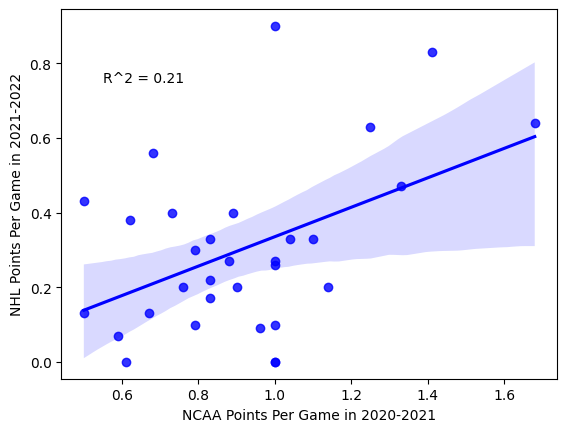

In [25]:
sns.regplot(x = ncaa_2020_21_nhl_2021_22.ncaa_ppg, y = ncaa_2020_21_nhl_2021_22.nhl_ppg, color = 'blue')
plt.xlabel("NCAA Points Per Game in 2020-2021")
plt.ylabel("NHL Points Per Game in 2021-2022")

# Lets add R^2 to the plot
RSQString = "R^2 = " + str(RSQ)
plt.text(0.55, 0.75, RSQString)
plt.show()


It is important to note in the plot above that the axes are not the same, so it could be misconstrued that someone scored more in the NHL than in the NCAA, but that is likely not the case. 

The values are not grouped closely to the line and there is some sort of loose correlation, but not enough to be significant. With a larger sample size, we could dial in the results.

---
Now we will create an NHL equivalency model using the methodology laid out by Gabriel Desjardins in [League Equivalencies](http://hockeyanalytics.com/Research_files/League_Equivalencies.pdf). This is his formula:

- Quality of League x = (Average PPG in NHL in Year 2) / (Average PPG in league x in Year 1)

In [27]:
nhl_ppg_average = np.mean(ncaa_2020_21_nhl_2021_22.nhl_ppg)

ncaa_ppg_average = np.mean(ncaa_2020_21_nhl_2021_22.ncaa_ppg)

ncaa_nhl_equivalency = nhl_ppg_average/ncaa_ppg_average

ncaa_nhl_equivalency

0.32991875662310144

Our calculation of 0.329919 is exactly the same as Desjardins' calculation of 0.33 in [League Equivalencies](http://hockeyanalytics.com/Research_files/League_Equivalencies.pdf). This means that one point in NCAA D1 Men's Hockey is worth 0.33 points in the NHL, or one third of a point.

Now we will finish up by creating a function that calculates the predicted points per game for an NHL season given a points per game metric from the NCAA.

In [28]:
def obtain_nhle_given_ncaa_ppg(ncaa_ppg):
    nhle = ncaa_ppg * 82 * ncaa_nhl_equivalency
    nhle = round(nhle, 2)
    print(nhle)

If you pass the NCAA points per game into the function, you receive the NHL equivalent points in an 82 game season.

In [31]:
obtain_nhle_given_ncaa_ppg(1)

27.05


Result: A 1 point per game season in the NCAA translates to a 27 point season in the NHL. For perspective, an NCAA season is typically 34 games. 

In 2020-21, Cole Caufield had 52 points in 30 games, so based off this model he should have had a 47 point season in the NHL the next year. He had a 43 point season in 67 games in 2021-22 in the NHL. I'd say this model is spot on.